In [11]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np  
import matplotlib.patches as mpatches
import seaborn as sns 
from statannot import add_stat_annotation

# from ComparisionPlot import FourGroupBoxPlot

In [54]:
information_raw = pd.read_csv("../../data/questionnaire/ICIC VR - Basic Information.csv")
cogload_raw = pd.read_csv("../../data/questionnaire/Firefighter Project Cognitive Load Survey.csv")
spatial_raw = pd.read_csv("../../data/questionnaire/Spatial Survey (Firefighter Project).csv")
auto_low_list = ['06', '08', '13', '15', '19', '22', '24', '27', '29', '31']
self_low_list = ['01', '02', '03', '04', '05', '07', '09', '11', '14', '16', '17', '18', '20', '21', '23', '25', '26', '28', '30']
not_include = ['10','12']
auto_low_list = list(map(int,auto_low_list))
self_low_list = list(map(int,self_low_list))
not_include = list(map(int,not_include))

In [55]:
cogload_raw[["The environment of the building was difficult to navigate.",
         "The procedure of searching for targets in a multi-story building was complex.",
         "I do not consider myself to have a good sense of direction (ability to know one’s location and perform wayfinding).",
         "I invested a high mental effort in the searching tasks.",
         "The way in which the instruction was presented on the UI panel (not content-related) was unclear.",
         "The way in which the instruction was presented on the UI panel (not content-related) was confusing.",
         "The change of brightness in UI during the experiment was distracting.",
         "I invested a high mental effort in using the the information presented on the UI panel (not content-related).",
         "Using the UI panel enhanced my knowledge of the environment.",
         "Using the UI panel enhanced my knowledge of the navigation process.",
         "Using the UI panel enhanced my ability to deal with this type of navigation task in an emergency situation.",
         "Using the UI panel helped me deal with instruction in a similar search task.",
         ]] = cogload_raw[["The environment of the building was difficult to navigate.",
         "The procedure of searching for targets in a multi-story building was complex.",
         "I do not consider myself to have a good sense of direction (ability to know one’s location and perform wayfinding).",
         "I invested a high mental effort in the searching tasks.",
         "The way in which the instruction was presented on the UI panel (not content-related) was unclear.",
         "The way in which the instruction was presented on the UI panel (not content-related) was confusing.",
         "The change of brightness in UI during the experiment was distracting.",
         "I invested a high mental effort in using the the information presented on the UI panel (not content-related).",
         "Using the UI panel enhanced my knowledge of the environment.",
         "Using the UI panel enhanced my knowledge of the navigation process.",
         "Using the UI panel enhanced my ability to deal with this type of navigation task in an emergency situation.",
         "Using the UI panel helped me deal with instruction in a similar search task.",
         ]].astype(float)

cogload_raw['spatial_difficult']= cogload_raw.iloc[:,3]+cogload_raw.iloc[:,4]+cogload_raw.iloc[:,5]+cogload_raw.iloc[:,6]
cogload_raw['UI_unclear']= cogload_raw.iloc[:,7]+cogload_raw.iloc[:,8]+cogload_raw.iloc[:,9]+cogload_raw.iloc[:,10]
cogload_raw['UI_useful']= cogload_raw.iloc[:,11]+cogload_raw.iloc[:,12]+cogload_raw.iloc[:,13]+cogload_raw.iloc[:,14]
cogload_raw['total']= cogload_raw.iloc[:,3]+cogload_raw.iloc[:,4]+cogload_raw.iloc[:,5]+cogload_raw.iloc[:,6]\
                    +cogload_raw.iloc[:,7]+cogload_raw.iloc[:,8]+cogload_raw.iloc[:,9]+cogload_raw.iloc[:,10]\
                    +44-cogload_raw.iloc[:,11]-cogload_raw.iloc[:,12]-cogload_raw.iloc[:,13]-cogload_raw.iloc[:,14]

spatial_raw = spatial_raw.replace(['None'],1.0)
spatial_raw = spatial_raw.replace(['Slight'],2.0)
spatial_raw = spatial_raw.replace(['Moderate'],3.0)
spatial_raw = spatial_raw.replace(['Severe'],4.0)
spatial_raw['total'] = spatial_raw.iloc[:,3]+spatial_raw.iloc[:,4]+spatial_raw.iloc[:,5]+spatial_raw.iloc[:,6]\
                    +spatial_raw.iloc[:,7]+spatial_raw.iloc[:,8]+spatial_raw.iloc[:,9]+spatial_raw.iloc[:,10]\
                    +spatial_raw.iloc[:,11]



In [56]:
cogload_raw = cogload_raw.drop([9,28,32,33,34])
spatial_raw = spatial_raw.drop([9,28,32,33,34])
cogload_raw.reset_index(inplace=True)
spatial_raw.reset_index(inplace=True)

In [57]:
cogload_raw['which_better'] = np.nan
spatial_raw['which_better'] = np.nan
# auto_low_list = list(map(int,auto_low_list))
# self_low_list = list(map(int,self_low_list))
# not_include = list(map(int,not_include))

for i in range(int(len(cogload_raw))):
    if cogload_raw[['Subject No.']].values.ravel()[i] in self_low_list:
        cogload_raw['which_better'][i] = 'self_low_cogload'
        spatial_raw['which_better'][i] = 'self_low_cogload'
    elif cogload_raw[['Subject No.']].values.ravel()[i] in auto_low_list:
        cogload_raw['which_better'][i] = 'auto_low_cogload'
        spatial_raw['which_better'][i] = 'auto_low_cogload'
    elif cogload_raw[['Subject No.']].values.ravel()[i] in not_include:
        cogload_raw['which_better'][i] = 'not_include'
        spatial_raw['which_better'][i] = 'not_include'


<ipython-input-57-03054db76232>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cogload_raw['which_better'][i] = 'self_low_cogload'
c:\A\software\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-57-03054db76232>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spatial_raw['which_better'][i] = 'self_low_cogload'
<ipyt

In [58]:
cogload_raw
# spatial_raw

,index,Timestamp,Subject No.,Experiment Group,The environment of the building was difficult to navigate.,The procedure of searching for targets in a multi-story building was complex.,I do not consider myself to have a good sense of direction (ability to know one’s location and perform wayfinding).,I invested a high mental effort in the searching tasks.,The way in which the instruction was presented on the UI panel (not content-related) was unclear.,The way in which the instruction was presented on the UI panel (not content-related) was confusing.,...,I invested a high mental effort in using the the information presented on the UI panel (not content-related).,Using the UI panel enhanced my knowledge of the environment.,Using the UI panel enhanced my knowledge of the navigation process.,Using the UI panel enhanced my ability to deal with this type of navigation task in an emergency situation.,Using the UI panel helped me deal with instruction in a similar search task.,spatial_difficult,UI_unclear,UI_useful,total,which_better
0,0,2022/03/23 11:51:00 AM AST,1,Control Group,7.0,5.0,6.0,5.0,4.0,2.0,...,2.0,3.0,4.0,4.0,4.0,23.0,9.0,15.0,61.0,self_low_cogload
1,1,2022/03/23 12:17:46 PM AST,1,Self-control UI,1.0,3.0,8.0,6.0,2.0,1.0,...,2.0,4.0,7.0,7.0,10.0,18.0,6.0,28.0,40.0,self_low_cogload
2,2,2022/03/23 12:29:19 PM AST,1,Automatic UI,1.0,4.0,8.0,6.0,2.0,2.0,...,2.0,4.0,6.0,6.0,6.0,19.0,7.0,22.0,48.0,self_low_cogload
3,3,2022/03/25 2:00:41 PM AST,2,Automatic UI,4.0,4.0,2.0,7.0,2.0,4.0,...,8.0,8.0,8.0,9.0,8.0,17.0,15.0,33.0,43.0,self_low_cogload
4,4,2022/03/25 2:12:10 PM AST,2,Control Group,4.0,4.0,1.0,8.0,2.0,2.0,...,4.0,8.0,8.0,9.0,8.0,17.0,9.0,33.0,37.0,self_low_cogload
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,87,2022/08/25 1:42:17 PM AST,30,Automatic UI,7.0,6.0,8.0,5.0,6.0,5.0,...,5.0,7.0,7.0,7.0,7.0,26.0,21.0,28.0,63.0,self_low_cogload
83,88,2022/08/25 1:52:21 PM AST,30,Control Group,7.0,5.0,7.0,5.0,8.0,6.0,...,6.0,7.0,8.0,8.0,8.0,24.0,25.0,31.0,62.0,self_low_cogload
84,89,2022/08/25 3:29:03 PM AST,31,Automatic UI,2.0,3.0,7.0,2.0,2.0,2.0,...,2.0,10.0,9.0,9.0,9.0,14.0,8.0,37.0,29.0,auto_low_cogload
85,90,2022/08/25 3:40:49 PM AST,31,Self-control UI,2.0,3.0,7.0,2.0,2.0,2.0,...,2.0,9.0,9.0,9.0,9.0,14.0,8.0,36.0,30.0,auto_low_cogload


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

self_low_cogload v.s. auto_low_cogload: Kruskal-Wallis paired samples, P_val=8.732e-01 stat=2.546e-02


IndexError: list index out of range

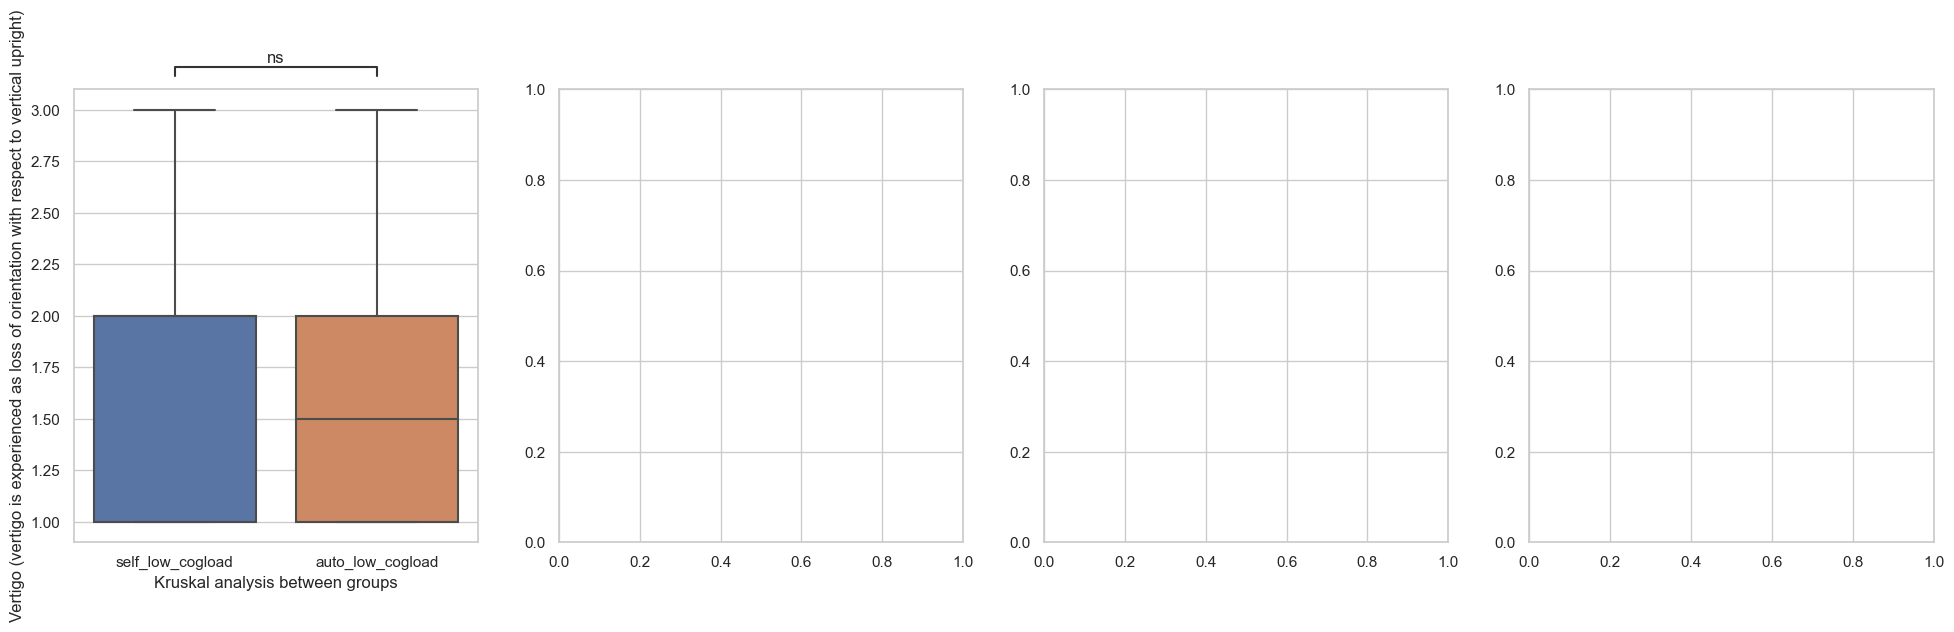

In [72]:
### pair analysis visualization 
sns.set(style = 'whitegrid')
# x = 'Experiment Group'
x = 'which_better'
# y_list = ["The environment of the building was difficult to navigate.",
#          "The procedure of searching for targets in a multi-story building was complex.",
#          "I do not consider myself to have a good sense of direction (ability to know one’s location and perform wayfinding).",
#          "I invested a high mental effort in the searching tasks."]
# y_list = ["The way in which the instruction was presented on the UI panel (not content-related) was unclear.",
#          "The way in which the instruction was presented on the UI panel (not content-related) was confusing.",
#          "The change of brightness in UI during the experiment was distracting.",
#          "I invested a high mental effort in using the the information presented on the UI panel (not content-related)."]
# y_list = ["Using the UI panel enhanced my knowledge of the environment.",
#          "Using the UI panel enhanced my knowledge of the navigation process.",
#          "Using the UI panel enhanced my ability to deal with this type of navigation task in an emergency situation.",
#          "Using the UI panel helped me deal with instruction in a similar search task."]
# y_list = ["General discomfort","Fatigue","Eyestrain","Difficulty focusing"]
# y_list = ["Headache","Fullness of head","Blurred vision","Dizzy (eyes closed)"]
y_list = ["Vertigo (vertigo is experienced as loss of orientation with respect to vertical upright)"]
# order = ["Automatic UI","Control Group","Self-control UI"]
order = ["self_low_cogload","auto_low_cogload"]
# method = 'Wilcoxon'
method = 'Kruskal'
# data = cogload_raw
data = spatial_raw
plot_line = 0

box_pairs=[
         (order[0], order[1]),
         # (order[0], order[2]),
         # (order[1], order[2]),
         ]

fig, axes = plt.subplots(1,4, figsize=(24,6), dpi=100)

y = y_list[0]
axes[0] = sns.boxplot(ax = axes[0], data=data, x=x, y=y, order=order)
# axes[0] = sns.violinplot(ax = axes[0], data=data, x=x, y=y, order=order)
if plot_line:
   for i in range(0,len(data),3):
      plot_data = np.zeros(3)
      for j in range(3):
         if data[[x]].values.ravel()[i+j] == order[0]:
            plot_data[0] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[1]:
            plot_data[1] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[2]:
            plot_data[2] = data[[y]].values.ravel()[i+j]
      axes[0].plot(plot_data)
test_results = add_stat_annotation(ax=axes[0], data=data, x=x, y=y, order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 )

axes[0].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[1]
axes[1] = sns.boxplot(ax = axes[1],data=data, x=x, y=y,order=order,)
if plot_line:
   for i in range(0,len(data),3):
      plot_data = np.zeros(3)
      for j in range(3):
         if data[[x]].values.ravel()[i+j] == order[0]:
            plot_data[0] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[1]:
            plot_data[1] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[2]:
            plot_data[2] = data[[y]].values.ravel()[i+j]
      axes[1].plot(plot_data)
test_results = add_stat_annotation(ax=axes[1], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 )
axes[1].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[2]
axes[2] = sns.boxplot(ax = axes[2],data=data, x=x, y=y,order=order,)
if plot_line:
   for i in range(0,len(data),3):
      plot_data = np.zeros(3)
      for j in range(3):
         if data[[x]].values.ravel()[i+j] == order[0]:
            plot_data[0] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[1]:
            plot_data[1] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[2]:
            plot_data[2] = data[[y]].values.ravel()[i+j]
      axes[2].plot(plot_data)
test_results = add_stat_annotation(ax=axes[2], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 )
axes[2].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[3]
axes[3] = sns.boxplot(ax = axes[3],data=data, x=x, y=y,order=order,)
if plot_line:
   for i in range(0,len(data),3):
      plot_data = np.zeros(3)
      for j in range(3):
         if data[[x]].values.ravel()[i+j] == order[0]:
            plot_data[0] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[1]:
            plot_data[1] = data[[y]].values.ravel()[i+j]
         if data[[x]].values.ravel()[i+j] == order[2]:
            plot_data[2] = data[[y]].values.ravel()[i+j]
      axes[3].plot(plot_data)
test_results = add_stat_annotation(ax=axes[3], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 )
axes[3].set(xlabel = method + ' analysis between groups', ylabel=y)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
Automatic UI v.s. Control Group: Wilcoxon test (paired samples), P_val=7.608e-01 stat=8.250e+01
Using zero_method  pratt
Control Group v.s. Self-control UI: Wilcoxon test (paired samples), P_val=9.036e-01 stat=9.150e+01
Using zero_method  pratt
Automatic UI v.s. Self-control UI: Wilcoxon test (paired samples), P_val=4.290e-01 stat=7.400e+01


d:\Tianyu\software\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


[Text(0.5, 42.25, 'Wilcoxon analysis between groups'),
 Text(89.25, 0.5, 'total')]

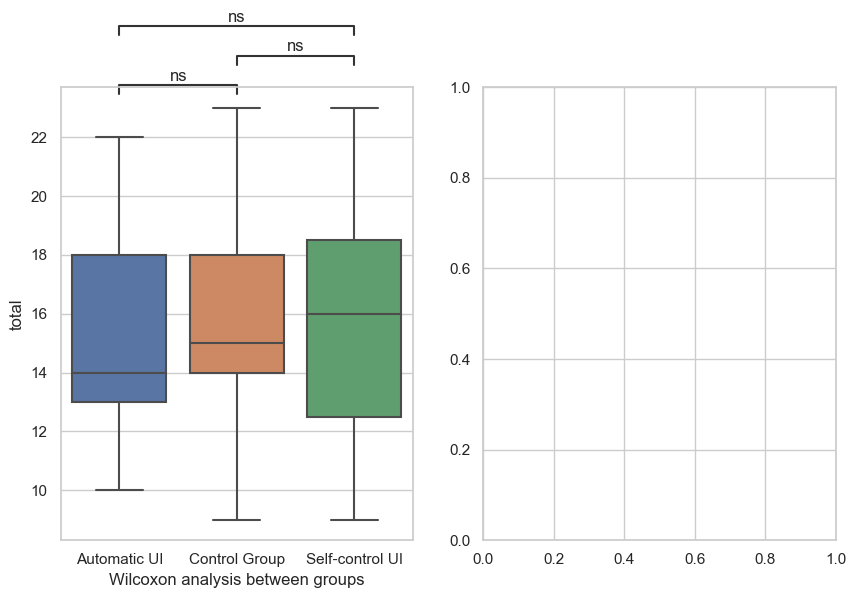

In [47]:
sns.set(style = 'whitegrid')
x = 'Experiment Group'
order = ["Automatic UI", "Control Group","Self-control UI"]
method = 'Wilcoxon'
# method = 'Kruskal'
data = spatial_raw

fig, axes = plt.subplots(1,2, figsize=(10,6), dpi=100)

y = 'total'
axes[0] = sns.boxplot(ax = axes[0], data=data, x=x, y=y, order=order)
# axes[0] = sns.violinplot(ax = axes[0], data=data, x=x, y=y, order=order)
test_results = add_stat_annotation(ax=axes[0], data=data, x=x, y=y, order=order,
                                 box_pairs=[
                                          (order[0], order[1]),
                                          (order[0], order[2]),
                                          (order[1], order[2]),
                                             ],
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 )
axes[0].set(xlabel = method + ' analysis between groups', ylabel=y)

In [3]:
df_nasa_g_condition = df_nasa_all.groupby('Conditions')
keys = df_nasa_g_condition.groups.keys()
keys_list = list(keys) # 0 automatic 2 control 4 haptic 6 visual 
print(keys_list)

['Automatic - 1', 'Automatic - 2', 'Control (Without assistance)-1', 'Control (Without assistance)-2', 'Haptic (With Haptic) -1', 'Haptic (With Haptic) -2', 'Visual (With Viusal) -1', 'Visual (With Viusal) -2']


In [5]:
def GetSum(index,df_g,keys_list):
    df = df_g.get_group(keys_list[index])
    df['NASA']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
    return df


In [6]:
df_a1= GetSum(0,df_nasa_g_condition,keys_list)
s_a1 = df_a1['NASA']
df_a2= GetSum(1,df_nasa_g_condition,keys_list)
s_a2 = df_a2['NASA']
s_a_all = pd.concat([s_a1, s_a2])

df_c1= GetSum(2,df_nasa_g_condition,keys_list)
s_c1 = df_c1['NASA']
df_c2= GetSum(3,df_nasa_g_condition,keys_list)
s_c2 = df_c2['NASA']
s_c_all = pd.concat([s_c1, s_c2])

df_h1= GetSum(4,df_nasa_g_condition,keys_list)
s_h1 = df_h1['NASA']
df_h2= GetSum(5,df_nasa_g_condition,keys_list)
s_h2 = df_h2['NASA']
s_h_all = pd.concat([s_h1, s_h2])

df_v1= GetSum(6,df_nasa_g_condition,keys_list)
s_v1 = df_v1['NASA']
df_v2= GetSum(7,df_nasa_g_condition,keys_list)
s_v2 = df_v2['NASA']
s_v_all = pd.concat([s_v1, s_v2])

print(len(s_a_all))
print(len(s_c_all))
print(len(s_h_all))
print(len(s_v_all))

66
66
66
66


<ipython-input-5-39297962ce57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NASA']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]


In [8]:
s_v_all

2      40
10     47
18     45
28     29
32     33
       ..
229    22
233    21
243    41
255    46
259    45
Name: NASA, Length: 66, dtype: int64

In [9]:
def FourGroupBoxPlot(c,h,a,k,c2,h2,a2,k2,t,yt,ymax,ymin,s1,s2,s3,s4,s5,s6,seg=3,s_tx_h=0.5,lh=1,ll=2.5,figsize=(8,8)):   
    all_data = [c,h,a,k]
    data_t2 = [c2,h2,a2,k2]
    labels = ['Control', 'Haptic', 'Automatic','Reverse']
    labels2 = ['', '', '','']

    fig, (ax1)= plt.subplots(nrows=1, ncols=1, figsize=figsize)
    size_ax = 16
    size_title = 20
    size_group = 14

    # rectangular box plot
    bplot1 = ax1.boxplot(all_data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels,
                        widths = 0.5,
                        positions = [1,4,7,10],
                        showfliers=False, ### ignore outliners
                        )  # will be used to label x-ticks
    bplot2 =ax1.boxplot(data_t2,
                        notch=False,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        widths = 0.5,
                        labels=labels2,
                        positions = [2,5,8,11],
                        showfliers=False, ### ignore outliners
                        )  # will be used to label x-ticks
    ax1.set_title(t,fontsize=size_title)


    colors = [(255/255,228/255,181/255, 1), (77/255, 175/255, 75/255, 1), (55/255, 126/255, 184/255, 1),(152/255, 78/255, 163/255, 1)]
   
    for patch, color in zip(bplot1['boxes'], colors):
        # change outline color
        patch.set(color='w', linewidth=1)
        # change fill color
        patch.set(facecolor =color)

    colors2 = [(255/255,228/255,181/255, 0.7), (77/255, 175/255, 75/255, 0.5), (55/255, 126/255, 184/255, 0.5),(152/255, 78/255, 163/255, 0.5)]

    for patch, color in zip(bplot2['boxes'], colors2):
        # change outline color
        patch.set(color='w', linewidth=1)
        # change fill color
        patch.set(facecolor =color)
        # change hatch
        patch.set(hatch = '/')

    ### custome legend
    trial_1 = mpatches.Patch(color=(153/255, 153/255, 153/255, 1), label='First Trial')
    trial_2 = mpatches.Patch(facecolor =(153/255, 153/255, 153/255, 0.5), label='Second Trial',hatch = '/',edgecolor='w',)
    ax1.legend(handles=[trial_1,trial_2], handlelength=ll, handleheight=lh,loc='upper right')
    # plt.legend(handles=[trial_1,trial_2],)



    # adding horizontal grid lines
    ax1.yaxis.grid(True)
    ax1.set_ylim([ymin,ymax])
    ax1.set_xlabel("Conditions",fontsize=size_ax)
    ax1.set_ylabel(yt,fontsize=size_ax)
    # ax1.set_xticks(np.arange(4))
    ax1.set_xticklabels(["Control","Haptic","Automatic","Reverse"," "," "," "," "],
    ha ='left',
    fontsize=size_group
    )

    ## plot significant level
    if(s1):
        x1 =1.5
        x2 = 4.5
        y, h, col = c.max() + seg*1, s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s1, ha='center', va='bottom', color=col)

    if(s2):
        x1 =1.5
        x2 = 7.5
        y, h, col = c.max() + seg*2, s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s2, ha='center', va='bottom', color=col)
    if(s3):
        x1 =1.5
        x2 = 10.5
        y, h, col = c.max() + seg*3, s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h,s3, ha='center', va='bottom', color=col)

    if(s4):
        x1 =4.5
        x2 = 7.5
        y, h, col = a.max() + seg*1,s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s4, ha='center', va='bottom', color=col)

    if(s5):
        x1 =4.5
        x2 = 10.5
        y, h, col = k.max() + seg*0.5, s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s5, ha='center', va='bottom', color=col)
    if(s6):
        x1 =7.5
        x2 = 10.5
        y, h, col = k.max() + seg*2, s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h,s6, ha='center', va='bottom', color=col)

    plt.show()

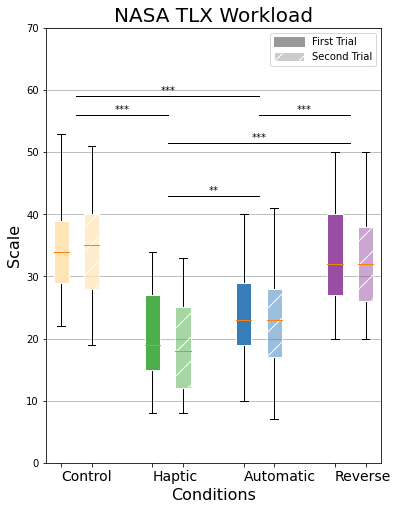

In [10]:
FourGroupBoxPlot(s_c1,s_h1,s_a1,s_v1,s_c2,s_h2,s_a2,s_v2,
t = 'NASA TLX Workload',
yt ="Scale",
figsize=(6,8),
ymax =70,ymin=0,
s1 ='***', # c-h
s2= '***', # c-a
s3=False,    # c-k 
s4 ='**', # h-a
s5= '***', # h-k
s6='***', # a-k
ll=3,
s_tx_h=0.01
)

In [11]:
def CovertdftoTTest(df_zig,df_zig2,condition):
    df_tt = pd.DataFrame(columns=['Condition', 'Subject','Score'])
    # print(df_zig['NASA'])
    df_tt['Score'] = df_zig['NASA'].values +df_zig2['NASA'].values
    df_tt['Subject'] = df_zig.Subject.values
    df_tt['Condition'] = condition
    return df_tt


In [12]:
# df_a2.reset_index()
# print(df_c2.NASA)
# print(df_a2.Subject)
df_ttc = CovertdftoTTest(df_c1,df_c2,'Control')
df_tth = CovertdftoTTest(df_h1,df_h2,'Haptic')
df_tta = CovertdftoTTest(df_a1,df_a2,'Automatic')
df_ttk = CovertdftoTTest(df_v1,df_v2,'Keyboard')


df_tt_all = pd.DataFrame()

df_tt_all =df_tt_all.append([df_ttc,df_tth,df_tta,df_ttk], ignore_index=True)

# df_tt_all.Score = df_tt_all.Score.apply(pd.to_numeric)
print(df_tt_all.tail)


<bound method NDFrame.tail of     Condition  Subject  Score
0     Control        1     72
1     Control        2     74
2     Control        3     91
3     Control        4     59
4     Control        5     80
..        ...      ...    ...
127  Keyboard       29     44
128  Keyboard       30     46
129  Keyboard       31     72
130  Keyboard       32     92
131  Keyboard       33     95

[132 rows x 3 columns]>


In [12]:
pg.pairwise_ttests(dv='Score', within='Condition', subject='Subject',
                   data=df_tt_all, parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,hedges
0,Condition,Automatic,Control,True,False,0.0,two-sided,0.000,-1.428
1,Condition,Automatic,Haptic,True,False,98.0,two-sided,0.001,0.573
2,Condition,Automatic,Keyboard,True,False,21.5,two-sided,0.000,-1.121
3,Condition,Control,Haptic,True,False,6.0,two-sided,0.000,2.029
4,Condition,Control,Keyboard,True,False,187.0,two-sided,0.152,0.252
5,Condition,Haptic,Keyboard,True,False,5.5,two-sided,0.000,-1.690


In [13]:
pg.rm_anova(dv='Score', within='Condition',
                  subject='Subject', data=df_tt_all, detailed=True,
                  effsize="ng2").round(4)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Condition,21112.6288,3,7037.5429,68.7874,0.0,0.4081,0.9531
1,Error,9821.6212,96,102.3086,NaN,NaN,NaN,NaN


In [14]:
### Trust Analysis ###
trust = './Data/Survey/Trust.csv'
df_trust_all = pd.read_csv(trust)
# print(df_trust_all)
df_trust_g_condition = df_trust_all.groupby('Conditions')
keys = df_trust_g_condition.groups.keys()
keys_trust_list = list(keys) # 0 automatic 2 control 4 haptic 6 visual 
print(keys_trust_list)

['Automatic', 'Haptic', 'Visual (Keyboard)']


In [17]:
def GetTrustSum(index,df_g,keys_list):
    df = df_g.get_group(keys_list[index])
    df['Trust']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
    return df

In [18]:
df_t_a1= GetTrustSum(0,df_trust_g_condition,keys_trust_list)
s_t_a1 = df_t_a1['Trust']

df_t_h1= GetTrustSum(1,df_trust_g_condition,keys_trust_list)
s_t_h1 = df_t_h1['Trust']

df_t_k1= GetTrustSum(2,df_trust_g_condition,keys_trust_list)
s_t_k1 = df_t_k1['Trust']






<ipython-input-17-5d9aaf03515f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trust']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
<ipython-input-17-5d9aaf03515f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Trust']= df.iloc[:,4]+df.iloc[:,5]+df.iloc[:,6]+df.iloc[:,7]+df.iloc[:,8]+df.iloc[:,9]
<ipython-input-17-5d9aaf03515f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [23]:
def CovertdftoTTest_Trust(df_zig,condition):
    df_tt = pd.DataFrame(columns=['Condition', 'Subject','Score'])
    # print(df_zig['NASA'])
    df_tt['Score'] = df_zig['Trust'].values
    df_tt['Subject'] = df_zig.Subject.values
    df_tt['Condition'] = condition
    return df_tt

In [25]:

df_tth = CovertdftoTTest_Trust(df_t_h1,'Haptic')
df_tta = CovertdftoTTest_Trust(df_t_a1,'Automatic')
df_ttk = CovertdftoTTest_Trust(df_t_k1,'Keyboard')


df_tt_all = pd.DataFrame()

# df_tt_all =df_tt_all.append([df_ttc,df_tth,df_tta,df_ttk], ignore_index=True)
df_tt_all =df_tt_all.append([df_tth,df_tta,df_ttk], ignore_index=True)

# df_tt_all.Score = df_tt_all.Score.apply(pd.to_numeric)
print(df_tt_all.tail)


<bound method NDFrame.tail of    Condition  Subject  Score
0     Haptic        5     54
1     Haptic        1     60
2     Haptic        6     48
3     Haptic        7     56
4     Haptic        8     60
..       ...      ...    ...
85  Keyboard       29     44
86  Keyboard       30     47
87  Keyboard       31     22
88  Keyboard       32     35
89  Keyboard       33     14

[90 rows x 3 columns]>


<ipython-input-25-7c3e3873f8e0>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tt_all =df_tt_all.append([df_tth,df_tta,df_ttk], ignore_index=True)


In [26]:
pg.pairwise_ttests(dv='Score', within='Condition', subject='Subject',
                   data=df_tt_all, parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,hedges
0,Condition,Automatic,Haptic,True,False,81.5,two-sided,0.002,-0.587
1,Condition,Automatic,Keyboard,True,False,23.5,two-sided,0.000,1.525
2,Condition,Haptic,Keyboard,True,False,14.0,two-sided,0.000,1.940


In [27]:
pg.rm_anova(dv='Score', within='Condition',
                  subject='Subject', data=df_tt_all, detailed=True,
                  effsize="ng2").round(4)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Condition,7181.4889,2,3590.7444,40.2272,0.0,0.0,0.4496,0.8095,False,0.7647,0.0234
1,Error,5177.1778,58,89.2617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


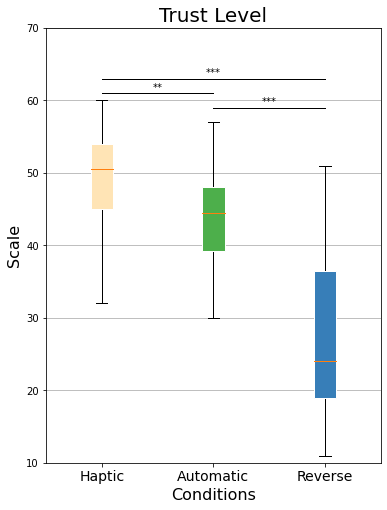

In [62]:
ThreeGroupBoxPlot(s_t_h1,s_t_a1,s_t_k1,
t = 'Trust Level',
yt ="Scale",
figsize=(6,8),
ymax =70,ymin=10,
s4 ='**', # h-a
s5= '***', # h-k
s6='***', # a-k
ll=3,
s_tx_h=0.1,
seg =2,
)

In [61]:
def ThreeGroupBoxPlot(h,a,k,t,yt,ymax,ymin,s4,s5,s6,seg=3,s_tx_h=0.5,lh=1,ll=2.5,figsize=(8,8)):   
    all_data = [h,a,k]
    labels = ['Haptic', 'Automatic','Reverse']
    labels2 = ['', '','']

    fig, (ax1)= plt.subplots(nrows=1, ncols=1, figsize=figsize)
    size_ax = 16
    size_title = 20
    size_group = 14

    # rectangular box plot
    bplot1 = ax1.boxplot(all_data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels,
                        widths = 0.2,
                        # positions = [1,4,7,10],
                        showfliers=False, ### ignore outliners
                        )  # will be used to label x-ticks
    ax1.set_title(t,fontsize=size_title)


    colors = [(255/255,228/255,181/255, 1), (77/255, 175/255, 75/255, 1), (55/255, 126/255, 184/255, 1),(152/255, 78/255, 163/255, 1)]
   
    for patch, color in zip(bplot1['boxes'], colors):
        # change outline color
        patch.set(color='w', linewidth=1)
        # change fill color
        patch.set(facecolor =color)



    ### custome legend
    trial_1 = mpatches.Patch(color=(153/255, 153/255, 153/255, 1), label='First Trial')
    trial_2 = mpatches.Patch(facecolor =(153/255, 153/255, 153/255, 0.5), label='Second Trial',hatch = '/',edgecolor='w',)
    # ax1.legend(handles=[trial_1,trial_2], handlelength=ll, handleheight=lh,loc='upper right')
    # plt.legend(handles=[trial_1,trial_2],)



    # adding horizontal grid lines
    ax1.yaxis.grid(True)
    ax1.set_ylim([ymin,ymax])
    ax1.set_xlabel("Conditions",fontsize=size_ax)
    ax1.set_ylabel(yt,fontsize=size_ax)
    # ax1.set_xticks(np.arange(4))
    ax1.set_xticklabels(["Haptic","Automatic","Reverse",],
    ha ='center',
    fontsize=size_group
    )

    ## plot significant level


    if(s4):
        x1 =1
        x2 = 2
        y, h, col = a.max() + seg*2,s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s4, ha='center', va='bottom', color=col)

    if(s5):
        x1 =1
        x2 = 3
        y, h, col = k.max() + seg*6, s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h, s5, ha='center', va='bottom', color=col)
    if(s6):
        x1 =2
        x2 = 3
        y, h, col = k.max() + seg*4, s_tx_h, 'k'
        plt.plot([x1,  x2], [y,  y], lw=1, c=col)
        plt.text((x1+x2)*.5, y+h,s6, ha='center', va='bottom', color=col)

    plt.show()

In [178]:
# Random test data

def BoxplotTrustInOne(h,a,k):

    all_data = [h,a,k]
    labels = ['Haptic', 'Automatic','Reverse']
    labels2 = ['', '','']

    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(4, 8))
    size_ax = 16
    size_title = 20
    size_group = 14

    # rectangular box plot
    bplot1 = ax1.boxplot(all_data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels,
                        widths = 0.3,
                        )  # will be used to label x-ticks
   
    ax1.set_title('Trust Level',fontsize=size_title)


    # fill with colors
    # colors = ['pink', 'lightblue', 'lightgreen','lightyellow']
    # colors = [(178/255, 24/255, 43/255, 1), (252/255, 141/255, 98/255, 1), (102/255, 194/255, 165/255, 1),(141/255, 160/255, 203/255, 1)]
    colors = [ (77/255, 175/255, 75/255, 1), (55/255, 126/255, 184/255, 1),(152/255, 78/255, 163/255, 1)]
   
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

    colors2 = [ (77/255, 175/255, 75/255, 0.5), (55/255, 126/255, 184/255, 0.5),(152/255, 78/255, 163/255, 0.5)]


    # adding horizontal grid lines
   
    ax1.yaxis.grid(True)
    ax1.set_ylim([10, 65])
    ax1.set_xlabel('Conditions',fontsize=size_ax)
    ax1.set_ylabel('Scale ',fontsize=size_ax)

    # ax1.set_xticks(np.arange(4))
    ax1.set_xticklabels(labels,
    # ha ='left',
    fontsize=size_group
    )

    plt.show()

In [9]:
# ### stastic analysis 

# TB = s_c_all
# TH = s_h_all
# TV = s_v_all
# TM = s_a_all

# print('----------Control VS Haptic----------')
# print(pg.wilcoxon(TB, TH, alternative='two-sided'))
# print('----------Control VS Reverse----------')
# print(pg.wilcoxon(TB,TV, alternative='two-sided'))
# print('----------Control VS Automatic----------')
# print(pg.wilcoxon(TB, TM, alternative='two-sided'))
# print('----------Haptic VS Reverse----------')
# print(pg.wilcoxon(TH, TV, alternative='two-sided'))
# print('----------Haptic VS Automatic----------')
# print(pg.wilcoxon(TH, TM, alternative='two-sided'))
# print('----------Reverse VS Automatic----------')
# print(pg.wilcoxon(TV, TM, alternative='two-sided'))

----------Control VS Haptic----------
          W-val alternative         p-val       RBC      CLES
Wilcoxon   27.5   two-sided  5.705656e-12  0.975124  0.920569
----------Control VS Reverse----------
          W-val alternative     p-val       RBC      CLES
Wilcoxon  698.0   two-sided  0.051089  0.285202  0.580693
----------Control VS Automatic----------
          W-val alternative         p-val       RBC      CLES
Wilcoxon   17.5   two-sided  8.075016e-12  0.983173  0.833907
----------Haptic VS Reverse----------
          W-val alternative         p-val       RBC      CLES
Wilcoxon   27.5   two-sided  1.277518e-11 -0.973558  0.129591
----------Haptic VS Automatic----------
          W-val alternative     p-val       RBC      CLES
Wilcoxon  394.5   two-sided  0.000027 -0.608631  0.349518
----------Reverse VS Automatic----------
          W-val alternative         p-val       RBC      CLES
Wilcoxon  130.5   two-sided  1.896567e-09  0.870536  0.773186


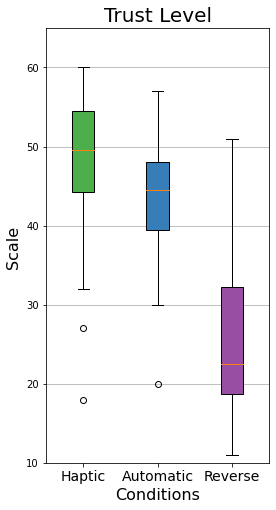

In [179]:
BoxplotTrustInOne(s_t_h1,s_t_a1,s_t_k1)

In [5]:
# Random test data

def BoxplotTrust(h,a,k,h2,a2,k2):

    all_data = [h,a,k]
    data_t2 = [h2,a2,k2]
    labels = ['Haptic', 'Automatic','Revese']

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # rectangular box plot
    bplot1 = ax1.boxplot(all_data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels)  # will be used to label x-ticks
    ax1.set_title('First Trial (1)')

    # notch shape box plot
    bplot2 = ax2.boxplot(data_t2,
                        notch=False,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels
                        )  # will be used to label x-ticks
    ax2.set_title('Second Trial (2)')

    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen','lightyellow']
    for bplot in (bplot1, bplot2):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)

    # adding horizontal grid lines
    for ax in [ax1, ax2]:
        ax.yaxis.grid(True)
        ax.set_ylim([0, 65])
        ax.set_xlabel('Conditions')
        ax.set_ylabel('Trust Levels')

    plt.show()

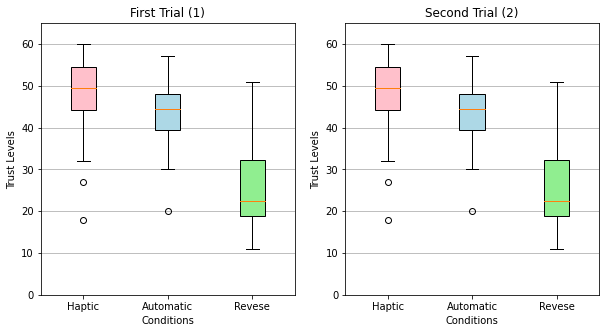

In [6]:
BoxplotTrust(s_t_h1,s_t_a1,s_t_k1,s_t_h1,s_t_a1,s_t_k1)

In [196]:
### stastic analysis 


TH = s_t_h1
TV = s_t_k1
TM = s_t_a1

# print('----------Control VS Haptic----------')
# print(pg.wilcoxon(TB, TH, alternative='greater'))
# print('----------Control VS Keyboad----------')
# print(pg.wilcoxon(TB,TV, alternative='greater'))
# print('----------Control VS Automatic----------')
# print(pg.wilcoxon(TB, TM, alternative='greater'))
print('----------Haptic VS Reverse----------')
print(pg.wilcoxon(TH, TV, tail='one-sided'))
print('----------Haptic VS Automatic----------')
print(pg.wilcoxon(TH, TM, tail='one-sided'))
print('----------Reverse VS Automatic----------')
print(pg.wilcoxon(TV, TM, tail='one-sided'))

----------Haptic VS Reverse----------
          W-val     tail     p-val       RBC      CLES
Wilcoxon  290.0  greater  0.000003  0.933333  0.911458
----------Haptic VS Automatic----------
          W-val     tail     p-val       RBC    CLES
Wilcoxon  240.5  greater  0.004357  0.603333  0.6875
----------Reverse VS Automatic----------
          W-val  tail     p-val       RBC     CLES
Wilcoxon   12.5  less  0.000004 -0.916667  0.87066


In [195]:
print('----------Haptic VS Reverse----------')
print(pg.wilcoxon(TH, TV, alternative='two-sided'))
print('----------Haptic VS Automatic----------')
print(pg.wilcoxon(TH, TM, alternative='two-sided'))
print('----------Reverse VS Automatic----------')
print(pg.wilcoxon(TV, TM, alternative='two-sided'))

----------Haptic VS Reverse----------


TypeError: wilcoxon() got an unexpected keyword argument 'alternative'